In [44]:
# voir https://makina-corpus.com/blog/metier/2019/python-carto

import pandas as pd
from opensky_api import OpenSkyApi
import matplotlib.pyplot as plt
from shapely.geometry import Point
%matplotlib inline
import geopandas

In [45]:
#bboxFrance= [min_latitude, max_latitude, min_longitude, max_latitude]
bboxFrance= [37.788, 54.008, -11.514, 31.33]

In [46]:
#  fly data
data =[]
api = OpenSkyApi()
states = api.get_states(bbox=bboxFrance)
for s in states.states:
    #print("(%r, %r, %r, %r)" % (s.longitude, s.latitude, s.velocity, s.callsign))
    if s.latitude != None and s.longitude != None:
       data.append(( s.callsign, float(s.longitude), float(s.latitude) ))
    else :
        pass
print(data[0:5]) 
print(len(data))

[('SWR339  ', -0.4468, 51.4692), ('SWR122W ', 9.8365, 52.198), ('SWR646  ', 6.5064, 47.4812), ('SWR358  ', 6.1116, 46.2359), ('SWR97Q  ', 12.0411, 52.1803)]
1502


In [47]:
df = pd.DataFrame(data, columns=['callsign', 'longitude', 'latitude'])

In [48]:
df.head()

,callsign,longitude,latitude
0,SWR339,-0.4468,51.4692
1,SWR122W,9.8365,52.1980
2,SWR646,6.5064,47.4812
3,SWR358,6.1116,46.2359
4,SWR97Q,12.0411,52.1803


In [49]:
df['Coordinates'] = list(zip(df.longitude, df.latitude))

In [50]:
df['Coordinates'] = df['Coordinates'].apply(Point)

In [51]:
gdf = geopandas.GeoDataFrame(df, geometry='Coordinates')

In [52]:
print(gdf.head())

   callsign  longitude  latitude                       Coordinates
0  SWR339      -0.4468   51.4692           POINT (-0.4468 51.4692)
1  SWR122W      9.8365   52.1980  POINT (9.836499999999999 52.198)
2  SWR646       6.5064   47.4812            POINT (6.5064 47.4812)
3  SWR358       6.1116   46.2359            POINT (6.1116 46.2359)
4  SWR97Q      12.0411   52.1803           POINT (12.0411 52.1803)


In [53]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world[0:10]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...
5,2967004.0,Asia,Armenia,ARM,18770.0,"POLYGON ((43.58274580259273 41.09214325618257,..."
6,3802.0,Antarctica,Antarctica,ATA,760.4,(POLYGON ((-59.57209469261153 -80.040178725096...
7,140.0,Seven seas (open ocean),Fr. S. Antarctic Lands,ATF,16.0,"POLYGON ((68.935 -48.62500000000001, 69.58 -48..."
8,21262641.0,Oceania,Australia,AUS,800200.0,(POLYGON ((145.3979781434948 -40.7925485166058...
9,8210281.0,Europe,Austria,AUT,329500.0,"POLYGON ((16.97966678230404 48.12349701597631,..."


In [69]:
a= world[world.name == 'France'].geometry


55    (POLYGON ((-52.55642473001839 2.50470530843705...
Name: geometry, dtype: object

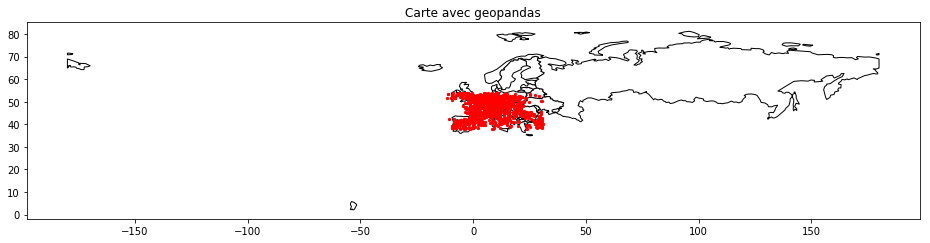

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(16, 16))
ax.set_aspect('equal')
world[world.continent == 'Europe'].plot(ax=ax, color='white', edgecolor='black')
gdf.plot(ax=ax, marker='o', color='red', markersize=5)
ax.set_title('Carte avec geopandas');

In [87]:
# Utilisation d'une autre carte plus adéquate
fp = "Europe_borders.shp"
europe = geopandas.read_file(fp)
europe.head()

,TZID,geometry
0,Europe/Berlin,"POLYGON ((8.457777976989746 54.56236267089844,..."
1,Europe/Berlin,"POLYGON ((8.71992015838623 47.69664382934571, ..."
2,Europe/Berlin,"POLYGON ((6.733166694641113 53.5740852355957, ..."
3,Europe/Berlin,"POLYGON ((6.858222007751465 53.59411239624024,..."
4,Europe/Berlin,"POLYGON ((6.89894437789917 53.6256103515625, 6..."


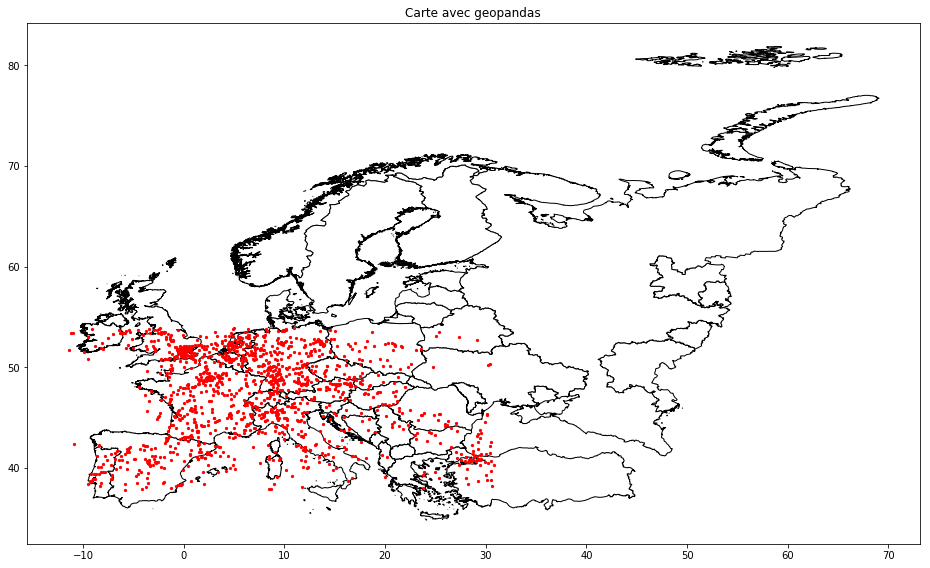

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(16, 16))
ax.set_aspect('equal')
europe.plot(ax=ax, color='white', edgecolor='black')
gdf.plot(ax=ax, marker='o', color='red', markersize=5)
ax.set_title('Carte avec geopandas');